In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import glob
import os

%matplotlib inline


In [7]:
results_dir='data/drift_tool_test/salish_test_20170411/output/'
# Use glob to find all netcdf files in results_dir
files = glob.glob(os.path.join(results_dir, '*.nc'))

In [8]:
files

['data/drift_tool_test/salish_test_20170411/output/salishseacast_ar_2017042300_P1D-602_1491901137.nc',
 'data/drift_tool_test/salish_test_20170411/output/salishseacast_ar_2017042400_P1D-125_1491883655.nc',
 'data/drift_tool_test/salish_test_20170411/output/salishseacast_ar_2017042300_P1D-132_1491850313.nc',
 'data/drift_tool_test/salish_test_20170411/output/salishseacast_ar_2017042500_P1D-641_1491878272.nc',
 'data/drift_tool_test/salish_test_20170411/output/salishseacast_ar_2017042500_P1D-614_1491966005.nc',
 'data/drift_tool_test/salish_test_20170411/output/salishseacast_ar_2017042300_P1D-615_1491972004.nc']

In [10]:
file = files[0]
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:       (time: 13)
Coordinates:
  * time          (time) datetime64[ns] 2017-04-23T08:43:37.999995 ...
Data variables:
    obs_lat       (time) float64 48.8 48.8 48.8 48.8 48.8 48.8 48.8 48.8 ...
    obs_lon       (time) float64 -123.1 -123.1 -123.1 -123.1 -123.1 -123.1 ...
    mod_lat       (time) float64 48.83 48.83 48.84 48.86 48.86 48.87 48.87 ...
    mod_lon       (time) float64 -123.0 -123.0 -123.0 -123.0 -123.0 -123.0 ...
    obs_offShore  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1
    liu           (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    molcard       (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    sep           (time) float64 7.782e+03 7.978e+03 9.152e+03 1.1e+04 ...
    obs_dist      (time) float64 0.0 2.461 4.922 23.36 11.2 4.53 1.464 1.111 ...
    obs_disp      (time) float64 0.0 2.469 7.406 30.7 41.01 45.5 44.15 44.61 ...
    mod_dist      (time) float64 0.0 282.8 1.499e+03 2.067e+03 107.4 980.6 ...
    m

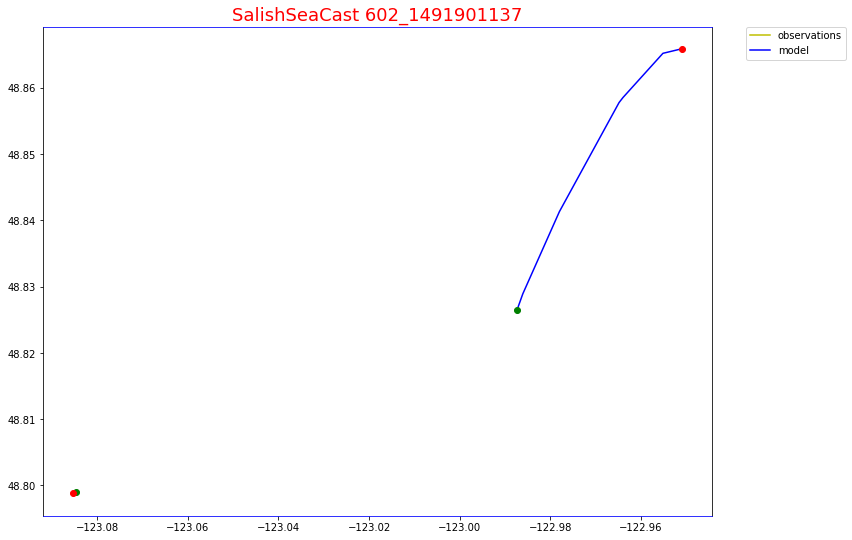

In [57]:
fig, ax = plt.subplots(1,1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 19
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
ax.plot(ds.obs_lon.values, ds.obs_lat.values, c='y', label='observations')
ax.plot(ds.obs_lon.values[0], ds.obs_lat.values[0], 'go')
ax.plot(ds.obs_lon.values[-1], ds.obs_lat.values[-1], 'ro')
ax.plot(ds.mod_lon.values, ds.mod_lat.values, c='b', label='model')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.plot(ds.mod_lon.values[0], ds.mod_lat.values[0], 'go')
ax.plot(ds.mod_lon.values[-1], ds.mod_lat.values[-1], 'ro')
ax.set_title('{} {}'.format(ds.ocean_model, ds.obs_buoyid), fontname='DejaVu Sans', fontsize=18)
ax.title.set_color('red')
ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')
